Before I move on to trying more complicated things that I would do with MATLAB (e.g. 3D plotting), I want to learn the basics of the thing I would like to do on R, namely data crunching and visualization. 

For that I will use [mtcars](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) database because:
* It's simple.
* It's standard.
* [Flowers](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/iris.html) are boring.
* Saddly, there's no simple, standard, motorcycles database.

So first I need to load the `Pandas` library. This library will introduce the `DataFrame` object much like R's own `data.frame`.

In [2]:
import pandas as pd

There's a package that brings RDatasets to Python, but I saved mtcars as a CSV (comma separated values) file because reading my own data from Python is a very important step. Which by the way is very easy:

In [3]:
cars = pd.read_csv("mtcars.csv")

To print what I just read, there's a `head` function. It will shows us the first bunch of rows. `head(n)` will give you the first `n` rows, but let's use the default.

In [4]:
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,Manual,4,4
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,Manual,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,Manual,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,Automatic,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,Automatic,3,2


We can see that there's no name for the first column. We could add a name like "carname", but in this case the name of the car represents a single row, so maybe we should use it as a name for the row instead of just $1,2,3,\dots$

In [5]:
cars = pd.read_csv("mtcars.csv",index_col=0)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,Manual,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,Manual,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,Manual,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,Automatic,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,Automatic,3,2


If you happen to know the dataset, you'll notice that I changed the variable `am` from binary to text. I did this to explore `pandas` use of categorical data from text.

Speaking of that, let's see how the data was saved in our variable.

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null object
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.0+ KB


We can see some important data on the...data (Metadata?). How each variable is stored and the memory size of the DataFrame. This is a *really* small dataset, but with bigger files this would be more and more important to be aware of.

Other function that seems very useful is `describe`, which summarizes the columns in the most standard statistics: count,mean, standard deviation and quartiles.

In [7]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,5.000000,8.0000


As a shortcut for visualization, there's another cool feature of pandas: we can call plot directly to the DataFrame. This allows to plot a histogram (or whatever) of some columns directly to see what we are doing. For this we need the plotting library. 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

To select a single column of our data, pandas uses `[]`. So for example we can get the `mpg` variable and get the histogram right out of the DataFrame object with:

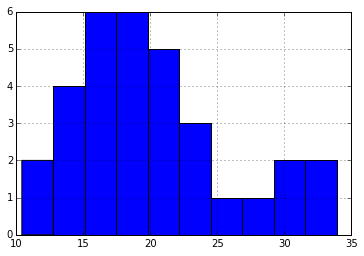

In [9]:
cars['mpg'].hist()
plt.show()

Now we can visualize some `pandas` functionality. For example, we can easily group by type of transmission using the `groupby` function. I take cars, select the columns 'mpg' and 'am', then apply the `groupby` function to tell `pandas` I want to group by 'am', and that I want to summarize the rest using the function mean. Finally I plot it.

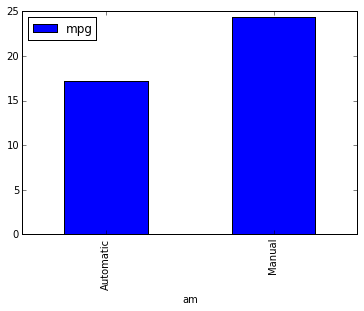

In [10]:
cars[['am','mpg']].groupby('am').mean().plot(kind='bar')
plt.show()

How about a scatter plot? Maybe I would want to see the relationship between miles per gallon vs the horse power.

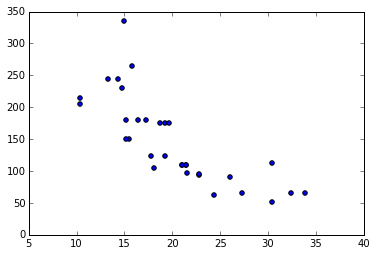

In [13]:
plt.scatter(cars['mpg'],cars['hp'])
plt.show()

### What about beautiful plots?

By this time some may be missing ggplot because of its elegant style. Well, matplotlib has different possible styles, included the beloved ggplot, only by setting `style.use`

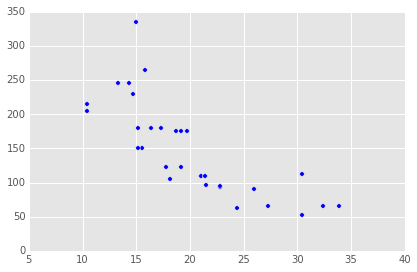

In [23]:
plt.style.use('ggplot')
plt.scatter(cars['mpg'],cars['hp'])
plt.show()

There is also another library called `seaborn` that brings new styles to matplotlib and more visualization functions. It doesn't come with the Anaconda distribution, but it's really easy to get. You just open a terminal (cmd/powershell on windows), type `conda install seaborn` and you're done. Now you just load it to get more beautiful plots and can begin to use fun plots like the `regplot`, which performs linear regression directly in the plot. Plot, plot. I'm setting the figure size because seaborn figures come out a little bigger and 

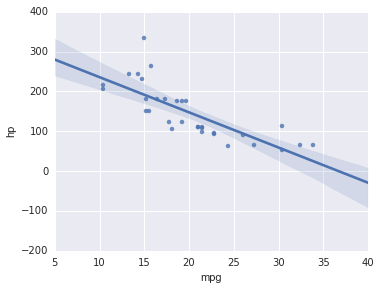

In [55]:
import seaborn as sns
plt.figure(figsize=(5, 4))

sns.regplot('mpg','hp',data=cars)

The dependence doesn't seem to be linear, let's try a polinomial regression.

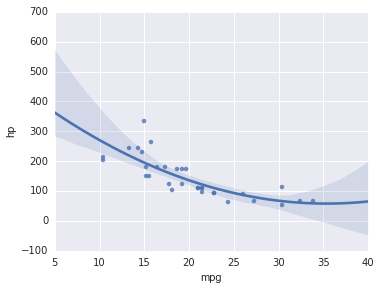

In [57]:
plt.figure(figsize=(5, 4))
sns.regplot('mpg','hp',data=cars,order=2)

One of the things I didn't like about R, or more specifically R on Windows, is that plots don't seem to have any anti-aliasing. I haven't had that problem in Python, although you wouldn't notice anyway since these graphs are all un PNG format now, which would look equally great if I generated them in R. I took a screenshot with an equivalent plot generated in RStudio:

``` R
library(ggplot2)

cars <- mtcars

ggplot(data = cars, aes(x=mpg,y=hp)) + geom_point() + 
  stat_smooth(method="lm",formula = y ~ poly(x,2,raw=TRUE))
```

*Look at that horrible line!*

If you have a workaround for turning on antialiasing on R for Windows I would very much appreciate it, since I've searched hungrily for it.

There's a ggplot library for Python too, although I read that it is a little buggy still. It would be really convenient to use the same graphic language when moving between Python and R. I needed to install it too by running `pip install ggplot` in the terminal. Notice that the `gsize` variable is just format and it's not necessary.

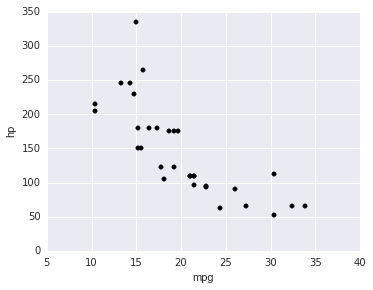

<ggplot: (-9223372036841740621)>

In [58]:
from ggplot import *
gsize = theme_matplotlib(rc={"figure.figsize": "5, 4"}, matplotlib_defaults=False)

ggplot(aes(x='mpg',y='hp'),data = cars) + geom_point() + gsize

I dropped the `stat_smooth` because there's no way to specify the model yet, apparently. Anyway there it is. I hope to